# Importing Modules


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [88]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

# Univariate Analysis


In [89]:
print(train_data.shape)
train_data.head()

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [90]:
train_data.sample(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
187106      316905       1         Cash loans           M            Y   
189533      319750       0         Cash loans           F            N   
72890       184523       0         Cash loans           F            N   
118756      237711       0         Cash loans           M            Y   
108966      226383       0         Cash loans           F            Y   
119508      238584       0         Cash loans           F            N   
193224      324069       0         Cash loans           F            N   
154608      279206       0         Cash loans           F            Y   
4813        105623       1         Cash loans           M            N   
182952      312054       1    Revolving loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
187106               Y             2          157500.0    592560.0   
189533               Y             0           90000.0    916470.0   
72890                N             0          234000.0    728460.0   
118756               Y             0          135000.0   1655253.0   
108966               Y             0          225000.0    675000.0   
119508               Y             0           76500.0    450000.0   
193224               Y             0          450000.0   1006920.0   
154608               N             0          135000.0    634482.0   
4813                 Y             0          180000.0    283419.0   
182952               N             0           90000.0    202500.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
187106      30384.0  ...                 0                0                0   
189533      26928.0  ...                 0                0                0   
72890       37134.0  ...                 0                0                0   
118756      45517.5  ...                 0                0                0   
108966      21775.5  ...                 0                0                0   
119508      23431.5  ...                 0                0                0   
193224      45499.5  ...                 0                0                0   
154608      20596.5  ...                 0                0                0   
4813        18450.0  ...                 0                0                0   
182952      10125.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
187106                0                        0.0                       0.0   
189533                0                        NaN                       NaN   
72890                 0                        0.0                       0.0   
118756                0                        0.0                       0.0   
108966                0                        0.0                       0.0   
119508                0                        0.0                       0.0   
193224                0                        0.0                       0.0   
154608                0                        0.0                       0.0   
4813                  0                        0.0                       0.0   
182952                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
187106                         0.0                        0.0   
189533                         NaN                        NaN   
72890                          0.0                        0.0   
118756                         0.0                        1.0   
108966                         0.0                        0.0   
119508                         0.0                        0.0   
193224                         0.0                        0.0   
154608                         0.0                        0.0   
4813                           0.0                        0.0   
182952    

# Handling Types of Features


In [91]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [92]:
# Identify binary numerical values in order to extend categorical fetures with them
binary_numerical_features = [col for col in train_data.select_dtypes(include=["float64", "int64"]).columns
                             if train_data[col].nunique() == 2]

categorical_features = list(
    train_data.select_dtypes(include=["object"]).columns)

categorical_features.extend(binary_numerical_features)
categorical_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCU

In [93]:
len(categorical_features)

49

In [94]:
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype("category")
    test_data[feature] = train_data[feature].astype("category")

for i, t in enumerate(train_data.dtypes):
    print(train_data.columns[i], t)

SK_ID_CURR int64
TARGET category
NAME_CONTRACT_TYPE category
CODE_GENDER category
FLAG_OWN_CAR category
FLAG_OWN_REALTY category
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE category
NAME_INCOME_TYPE category
NAME_EDUCATION_TYPE category
NAME_FAMILY_STATUS category
NAME_HOUSING_TYPE category
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL category
FLAG_EMP_PHONE category
FLAG_WORK_PHONE category
FLAG_CONT_MOBILE category
FLAG_PHONE category
FLAG_EMAIL category
OCCUPATION_TYPE category
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START category
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION category
REG_REGION_NOT_WORK_REGION category
LIVE_REGION_NOT_WORK_REGION category
REG_CITY_NOT_LIVE_CITY category
REG_CITY_NOT_WORK_CITY category
LIVE_

In [95]:
# dropping id
train_data.drop(columns=['SK_ID_CURR'], inplace=True)

numerical_features = train_data.select_dtypes(
    include=['float64', 'int64']).columns
numerical_features

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
 

# Missing Data


In [96]:
print(train_data.isna().sum())

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64


In [97]:
# Imputation missing categorical data with mode
mode = train_data[categorical_features].mode()
test_mode = test_data[categorical_features].mode()

train_data[categorical_features] = train_data[categorical_features].fillna(
    mode)
test_data[categorical_features] = test_data[categorical_features].fillna(
    test_mode)

# Imputation missing numerical data with mean
mean_values = train_data[numerical_features].mean()
test_mean_values = test_data[numerical_features].mean()

train_data[numerical_features] = train_data[numerical_features].fillna(
    mean_values)
test_data[numerical_features] = test_data[numerical_features].fillna(
    test_mean_values)

In [98]:
print(train_data.isnull().sum())

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64


# Duplicates


In [99]:
train_data[train_data.duplicated()]

Empty DataFrame
Columns: [TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, ...]
Index: []

[0 rows x 121 columns]

# Distributions


In [100]:
train_data.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.454517   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868  -16036.995067   
std       3.692794e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
count  307511.000000      307511.000000    307511.000000  ...   
mean    63815.045904       -4986.120328     -2994.202373  ...   
std    141275.766519        3522.886321      1509.450419  ...   
min    -17912.000000      -24672.000000     -7197.000000  ...   
25%     -2760.000000       -7479.500000     -4299.000000  ...   
50%     -1213.000000       -4504.000000     -3254.000000  ...   
75%      -289.000000       -2010.000000     -1720.000000  ...   
max    365243.000000           0.000000         0.000000  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.143421                  1.405292   
std                    0.445956                  2.375849   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             307511.000000           307511.000000   
mean                   0.100049             -962.858788   
std                    0.361689              826.807143   
min                    0.000000            -4292.000000   
25%                    0.000000            -1570.000000   
50%                    0.000000             -757.000000   
75%                    0.000000             -274.000000   
max                   24.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.006402                   0.007000   
std                      0.077983                   0.103009   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.034362                   0.267395   
std                      0.190366                   0.851923   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0

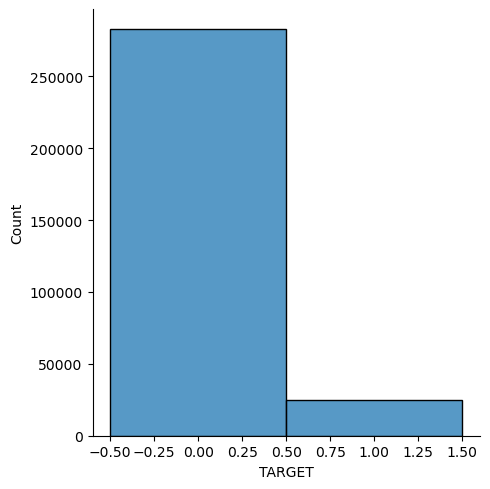

In [101]:
sns.displot(train_data['TARGET'], kde=False)

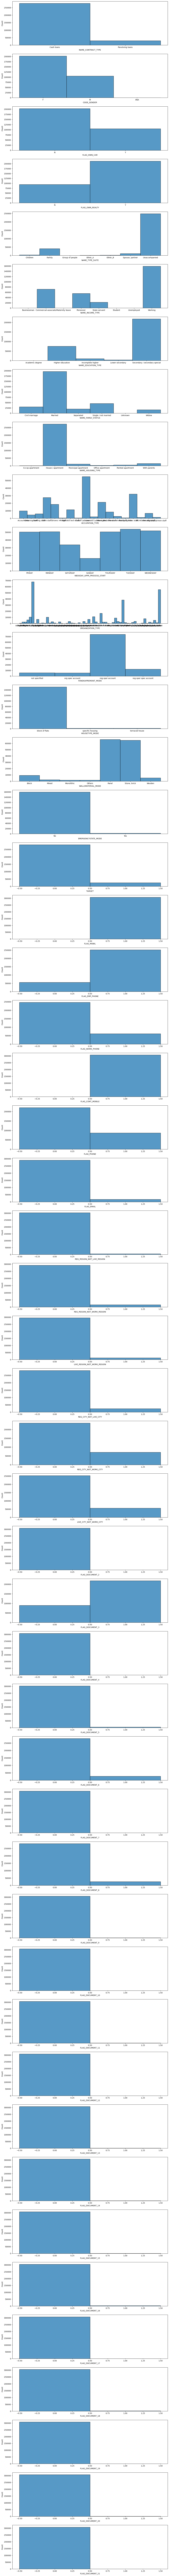

In [102]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(15, 250)
for i, col in enumerate(categorical_features):
    sns.histplot(train_data[col], kde=False, ax=axes[i])
plt.show()

array([[<Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT_W_CITY'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>],
       [<Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APAR

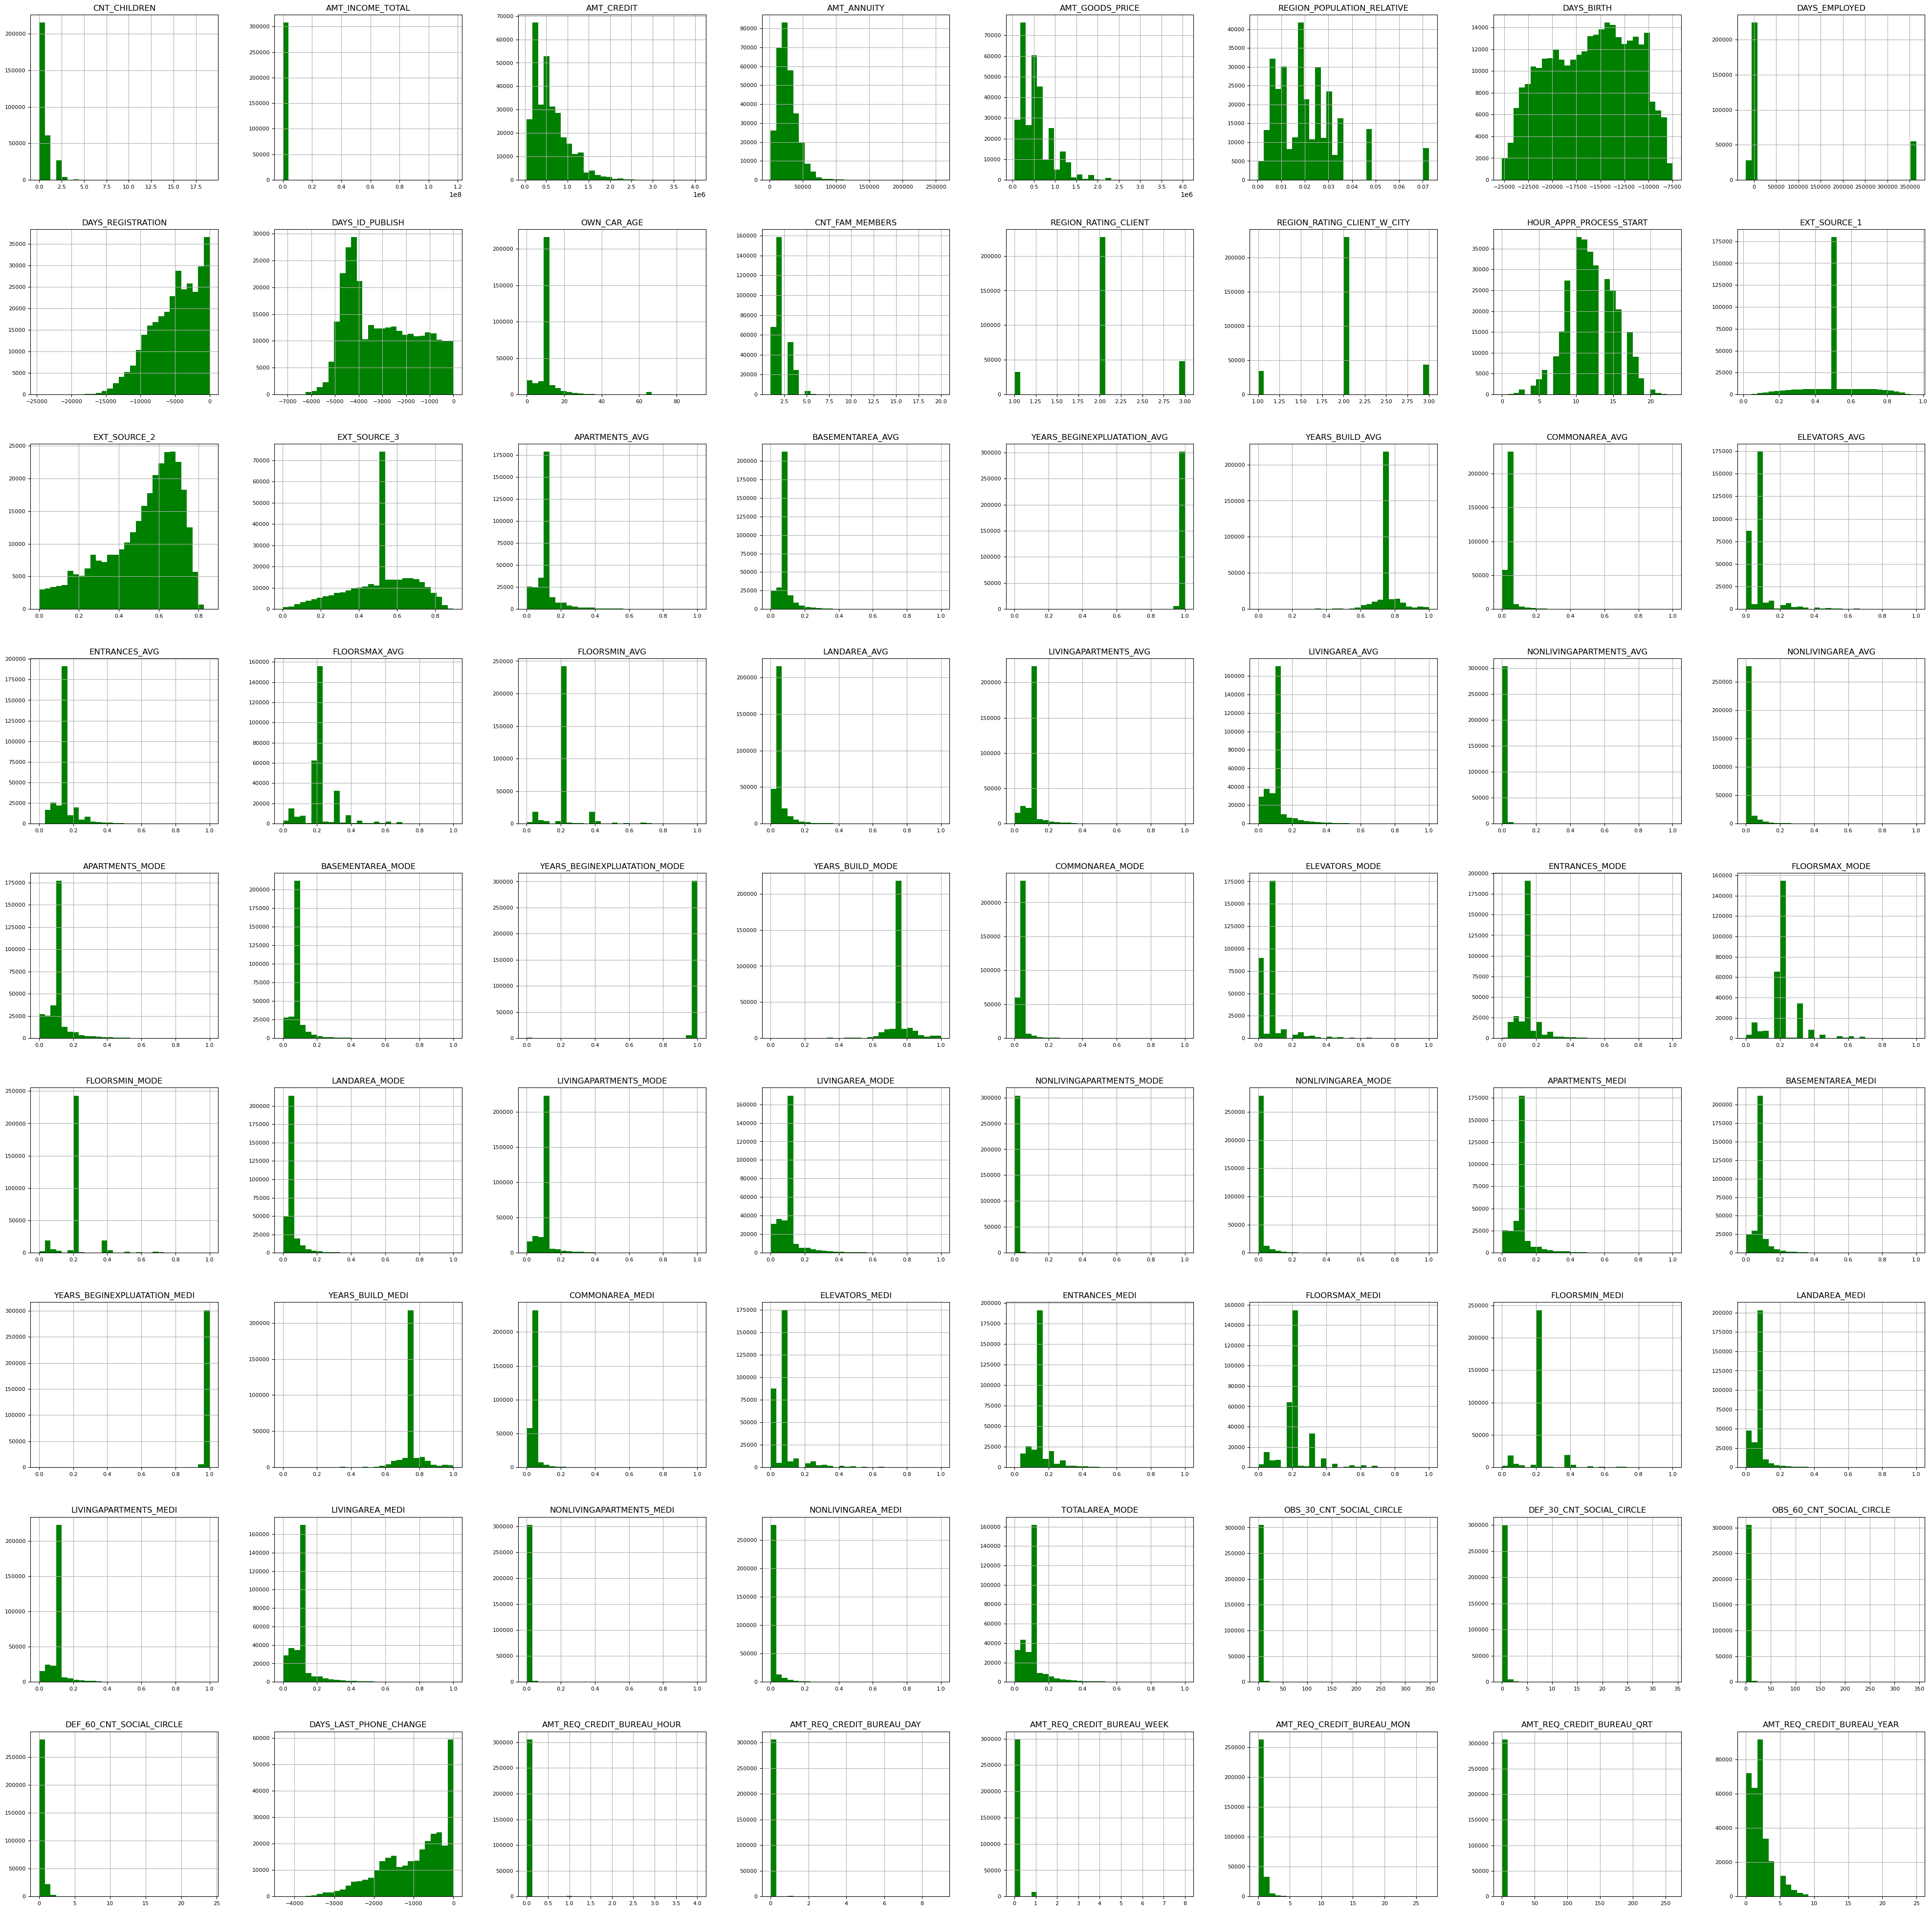

In [103]:
train_data[numerical_features].hist(
    figsize=(50, 50), color='g', bins=30, xlabelsize=8, ylabelsize=8)

In [104]:
train_data[numerical_features].median()

CNT_CHILDREN                       0.000000
AMT_INCOME_TOTAL              147150.000000
AMT_CREDIT                    513531.000000
AMT_ANNUITY                    24903.000000
AMT_GOODS_PRICE               450000.000000
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.000000
AMT_REQ_CREDIT_BUREAU_WEEK         0.000000
AMT_REQ_CREDIT_BUREAU_MON          0.000000
AMT_REQ_CREDIT_BUREAU_QRT          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Length: 72, dtype: float64

In [105]:
train_data[numerical_features].mean()

CNT_CHILDREN                       0.417052
AMT_INCOME_TOTAL              168797.919297
AMT_CREDIT                    599025.999706
AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Length: 72, dtype: float64

# Outliers


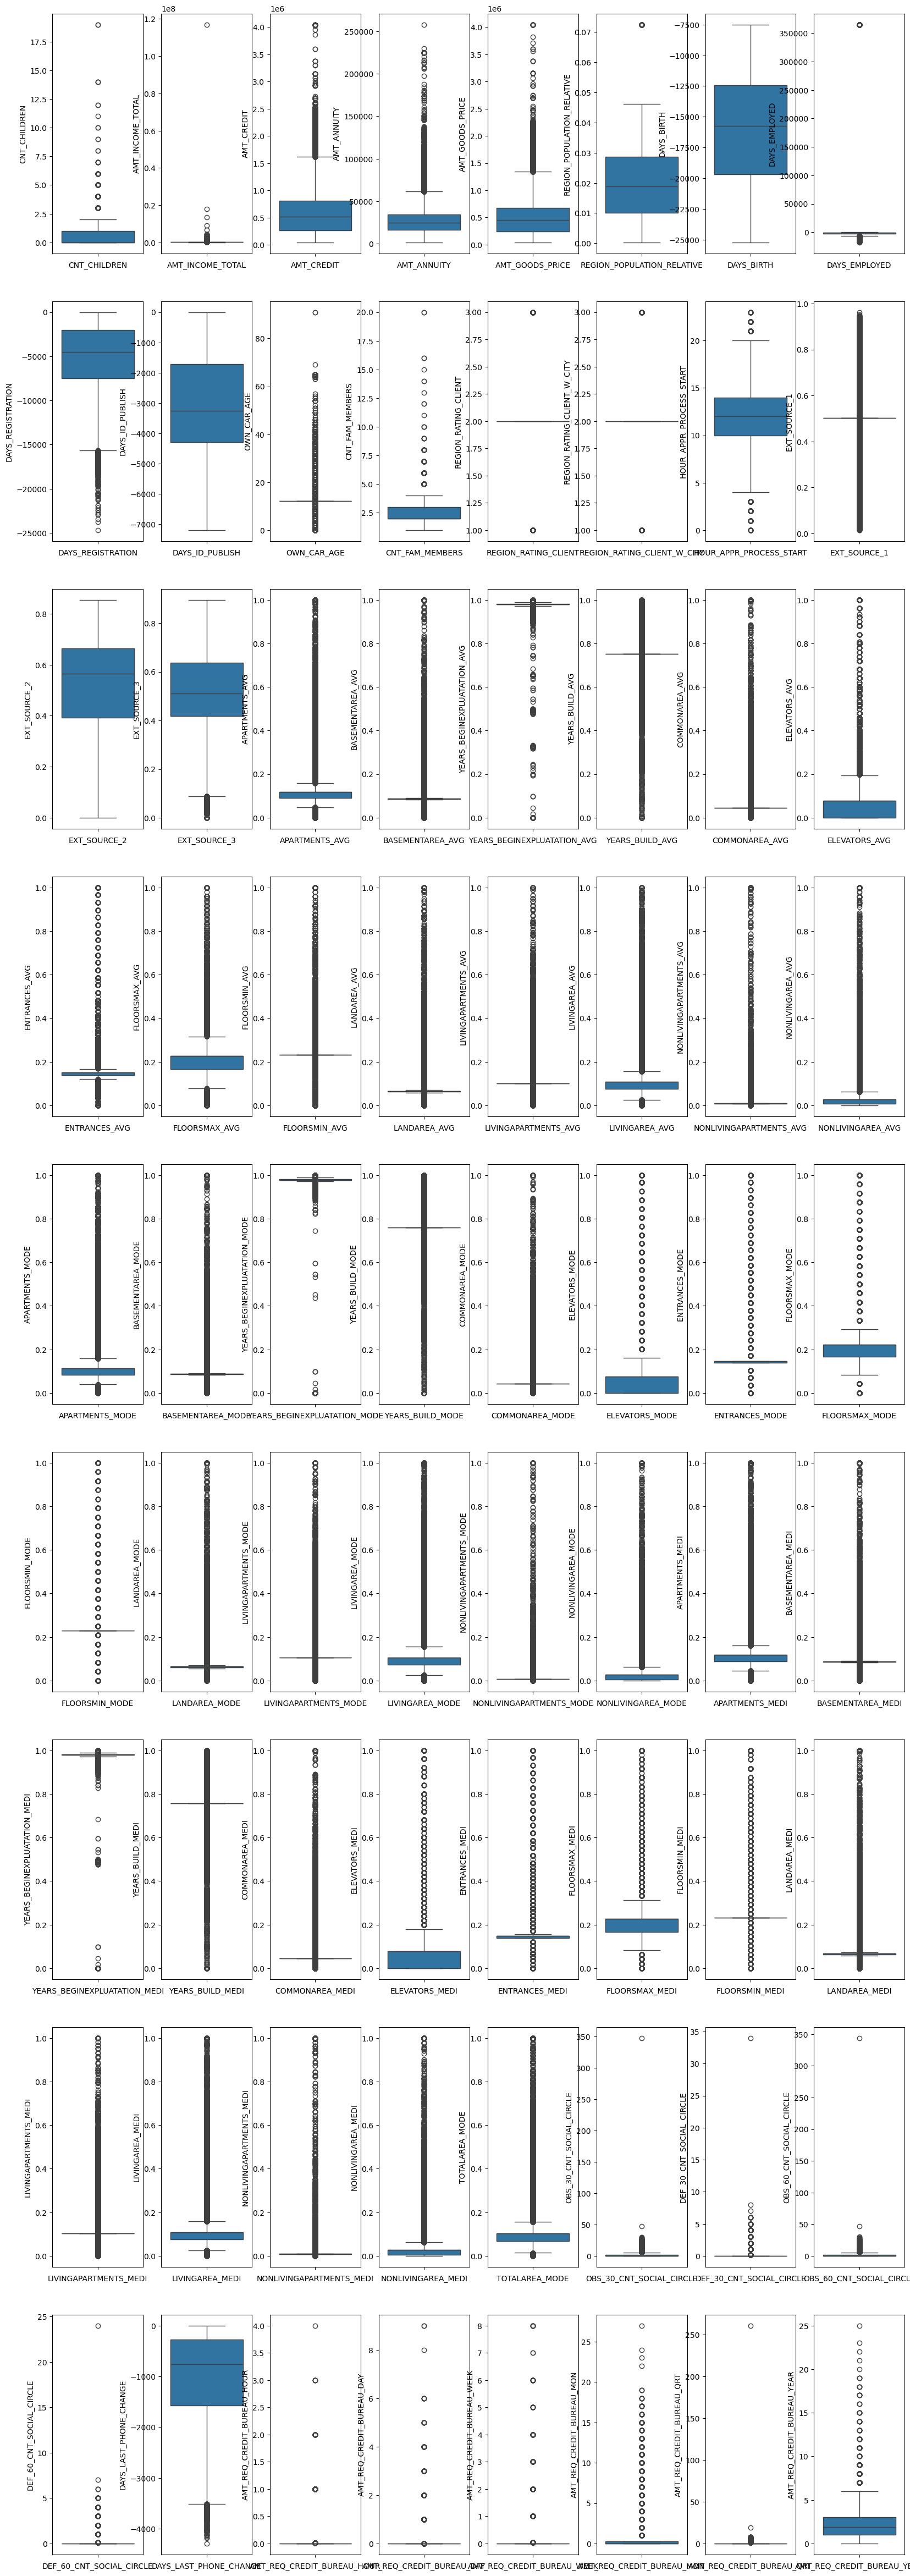

In [106]:
columns = 8
fig, axes = plt.subplots(
    nrows=len(numerical_features) // columns, ncols=columns)
fig.set_size_inches(20, 60)
for i, col in enumerate(numerical_features):
    sns.boxplot(train_data[col], ax=axes[i // columns, i % columns])
    axes[i // columns, i % columns].set_xlabel(col)

plt.show()

# Correlation Matrix


<Axes: >

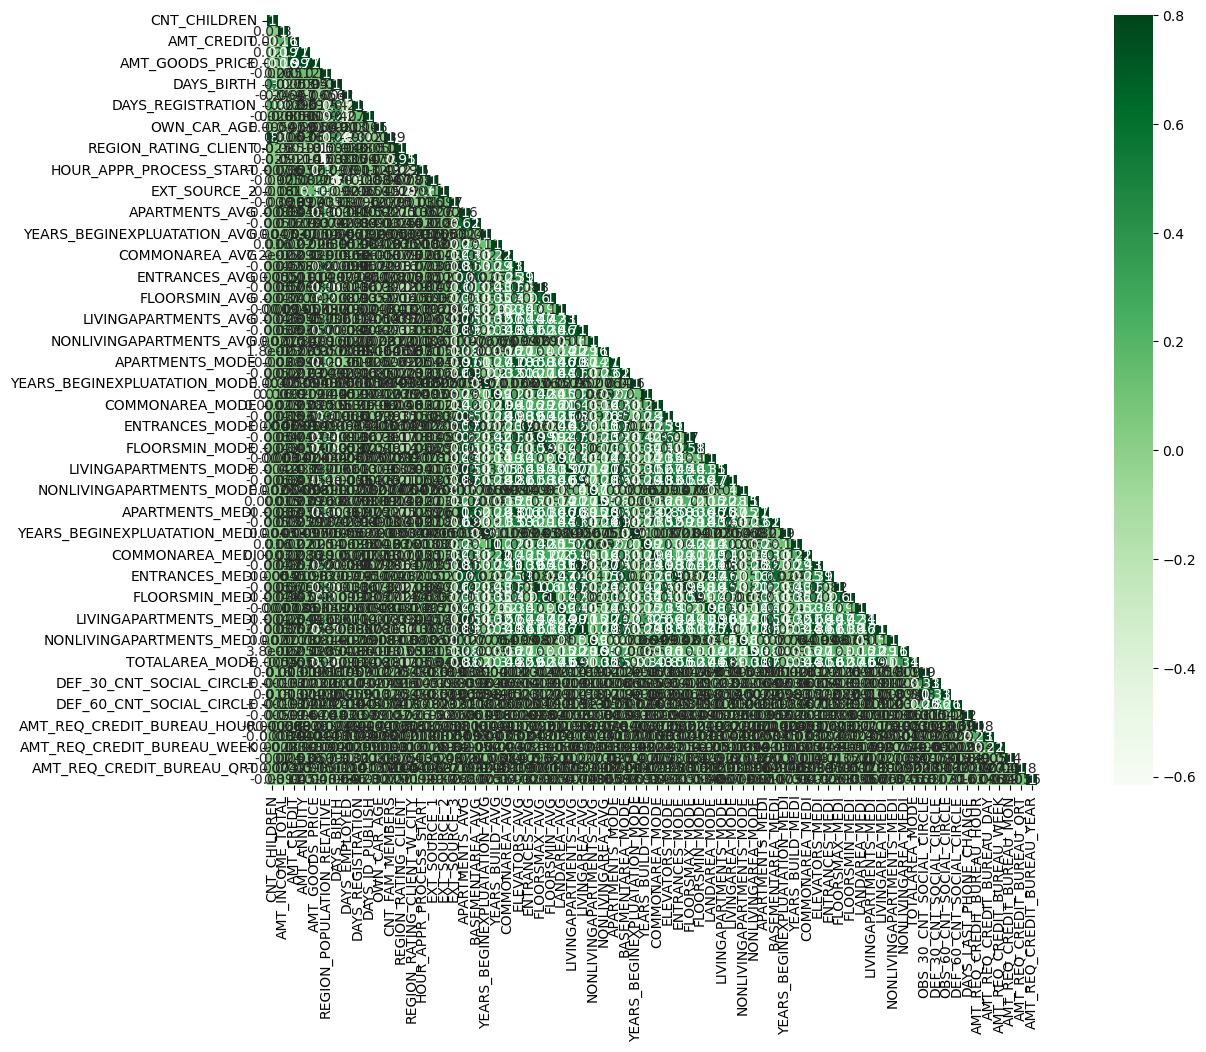

In [107]:
corrMatt = train_data[numerical_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,
            vmax=.8, square=True, annot=True)

# Creating Classifier


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [109]:
train_features = train_data[numerical_features]
train_features

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801       -9461   
1             1129500.0                    0.003541      -16765   
2              135000.0                    0.010032      -19046   
3              297000.0                    0.008019      -19005   
4              513000.0                    0.028663      -19932   
...                 ...                         ...         ...   
307506         225000.0                    0.032561       -9327   
307507         225000.0                    0.025164      -20775   
307508         585000.0                    0.005002      -14966   
307509         319500.0                    0.005313      -11961   
307510         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  \
0                -637            -3648.0            -2120  ...   
1               -1188            -1186.0             -291  ...   
2                -225            -4260.0            -2531  ...   
3               -3039            -9833.0            -2437  ...   
4               -3038            -4311.0            -3458  ...   
...               ...                ...              ...  ...   
307506           -236            -8456.0            -1982  ...   
307507         365243            -4388.0            -4090  ...   
307508          -7921            -6737.0            -5150  ...   
307509          -4786            -2562.0             -931  ...   
307510          -1262            -5128.0             -410  ...   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       6.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                            2.0                 -1134.0   
1                            0.0                  -828.0   
2                            0.0                  -815.0   
3                            0.0                  -617.0   
4                            0.0                 -1106.0   
...                          ...                     ...   
307506                       0.0                  -273.0   
307507                       0.0                     0.0   
307508                       0.0                 -1909.0   
307509                       0.0                  -322.0   
307510                       0.0                  -787.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.000000                      0.000   
1        

In [112]:
train_x, test_x, train_y, test_y = train_test_split(
    train_features, train_data["TARGET"], test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(train_x)
scaled_test_x = scaler.transform(test_x)
scaled_test_data_x = scaler.transform(test_data[numerical_features])

# Model Training
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(scaled_train_x, train_y)

# Model Evaluation
train_preds = lr.predict(scaled_train_x)
train_roc_auc = roc_auc_score(train_y, train_preds)
print(f"Training ROC AUC: {train_roc_auc}")

test_preds = lr.predict(scaled_test_x)
test_roc_auc = roc_auc_score(test_y, test_preds)
print(f"Test ROC AUC: {test_roc_auc}")

# Cross-validation
cv_scores = cross_val_score(
    lr, scaled_train_x, train_y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC AUC: {cv_scores.mean()} (± {cv_scores.std()})")

test_pred_probs = lr.predict_proba(scaled_test_data_x)[:, 1]
test_output = pd.DataFrame(test_data['SK_ID_CURR'])
test_output['TARGET'] = test_pred_probs
test_output.head(10)

Training ROC AUC: 0.671924481659816
Test ROC AUC: 0.6687089845582919
Cross-Validation ROC AUC: 0.7310095085055582 (± 0.002720039987621326)


SK_ID_CURR    TARGET
0      100001  0.450276
1      100005  0.629963
2      100013  0.354240
3      100028  0.199259
4      100038  0.564230
5      100042  0.459657
6      100057  0.260330
7      100065  0.486165
8      100066  0.212623
9      100067  0.725000

In [111]:
test_output.to_csv('submission2.csv', index=False)

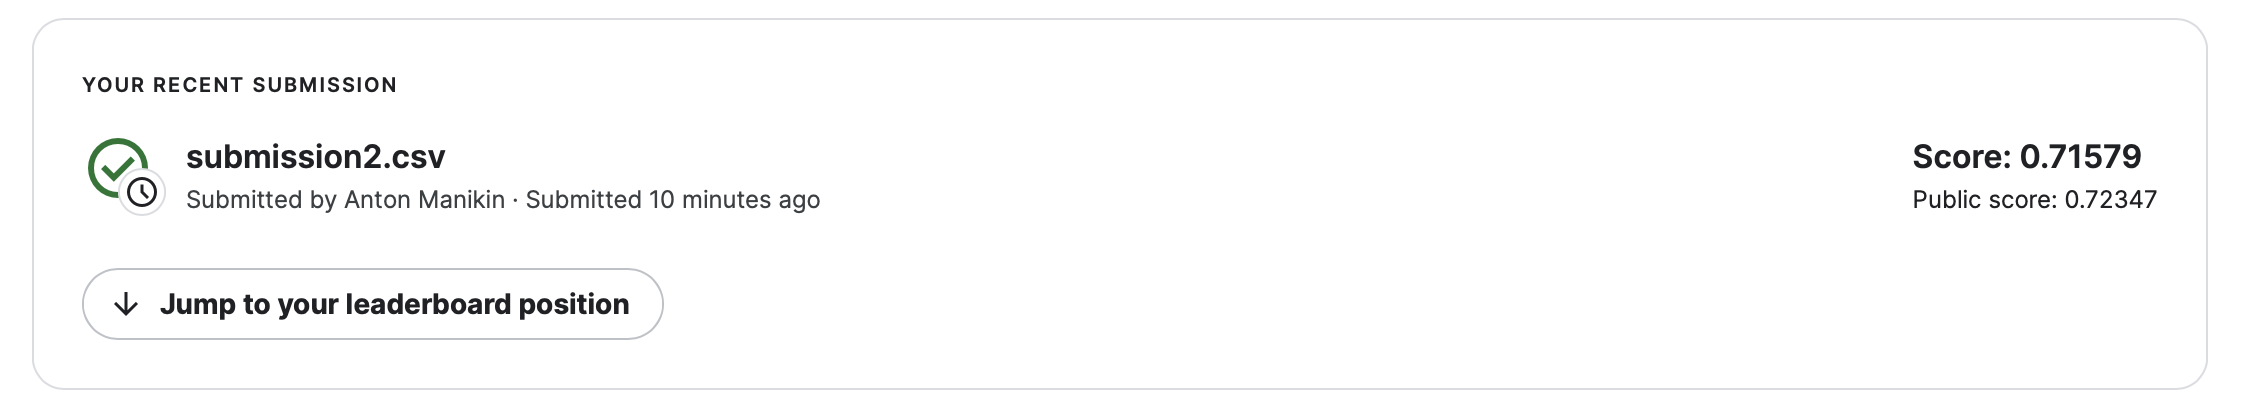
